<a href="https://colab.research.google.com/github/LamiaAlariqi/shi_task/blob/main/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

___

# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
# using info and describe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


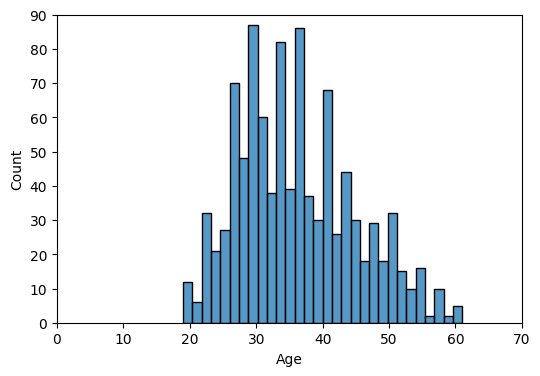

In [ ]:
#** Create a histogram of the Age*
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', bins=30)
plt.xlim(0, 70)
plt.ylim(0,90)
plt.xlabel('Age')
plt.show()

<Figure size 800x1000 with 0 Axes>

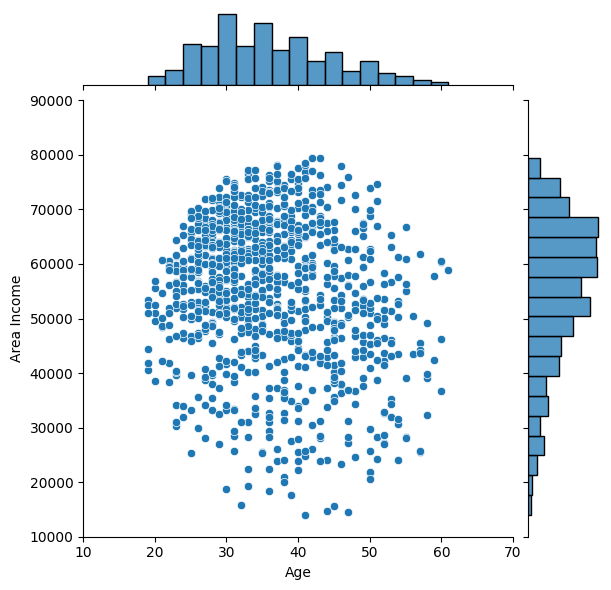

In [ ]:
#Create a jointplot showing Area Income versus Age.
plt.figure(figsize=(8, 10))
sns.jointplot(data=data, x='Age', y='Area Income', kind='scatter')
plt.xlim(10,70)
plt.ylim(10000,90000)
plt.xlabel('Age')
plt.ylabel('Area Income')
plt.show()

<Figure size 800x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


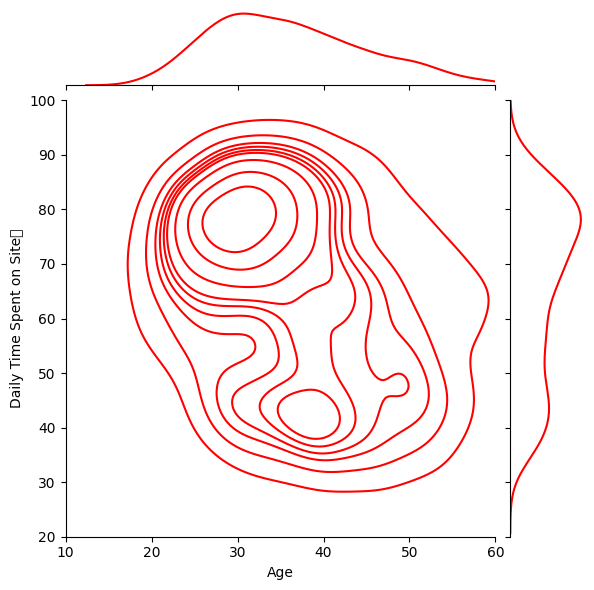

In [ ]:
#Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.
plt.figure(figsize=(8, 10))
sns.jointplot(data=data, x='Age', y='Daily Time Spent on Site', kind='kde',color = 'red')
plt.xlim(10,60)
plt.ylim(20,100)
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site	')
plt.show()

<ipython-input-35-5907ff79a6cd>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(50, 300, 50)


<Figure size 600x400 with 0 Axes>

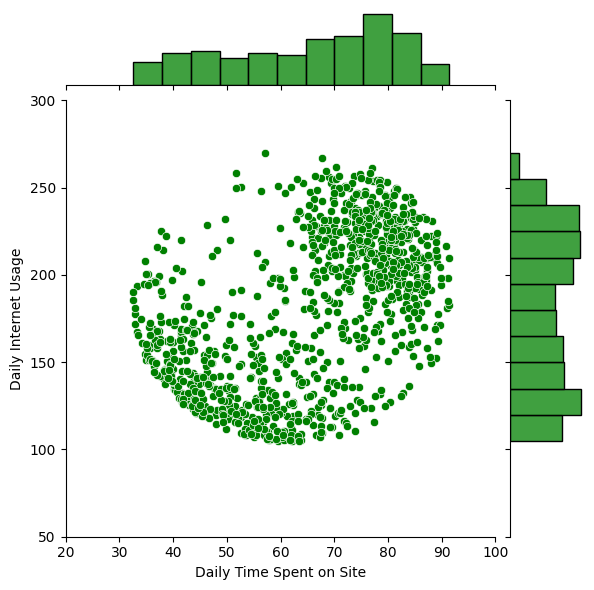

In [ ]:
# Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

plt.figure(figsize=(6, 4))
sns.jointplot(data=data, x='Daily Time Spent on Site', y='Daily Internet Usage', kind='scatter', color="green")
plt.xlim(20,100)
plt.ylim(50, 300, 50)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.show()

<Figure size 600x400 with 0 Axes>

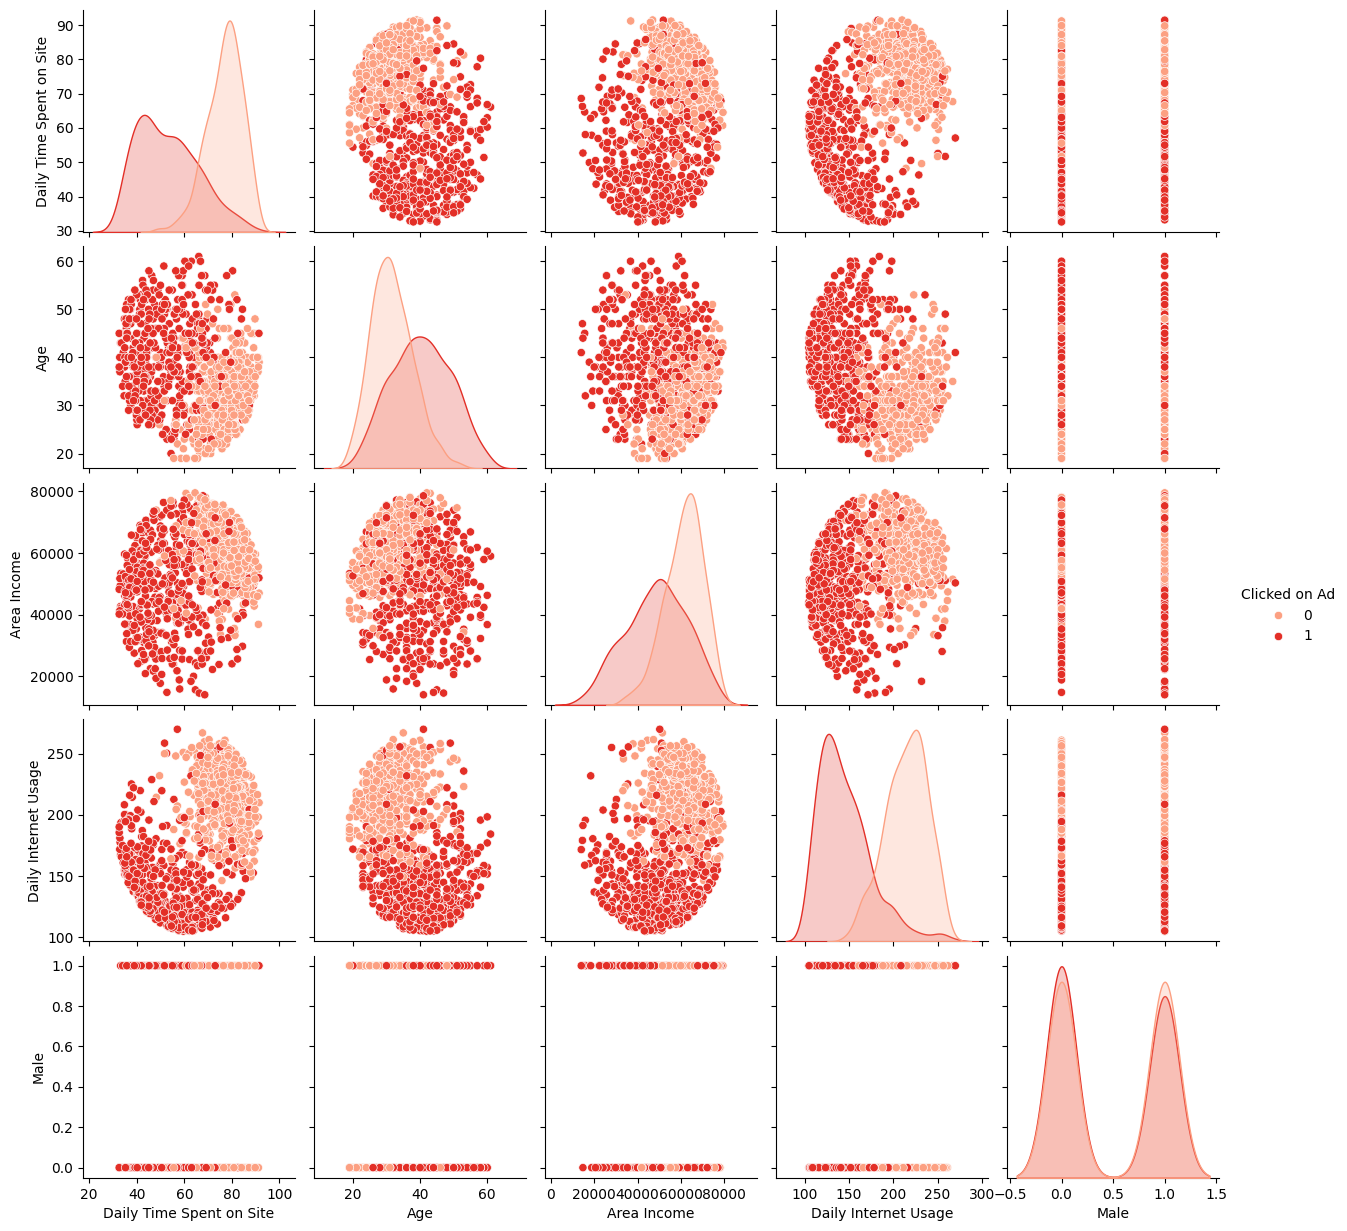

In [ ]:
sns.pairplot(data=data, hue='Clicked on Ad',palette='Reds')